<a href="https://colab.research.google.com/github/godfree12/Diabete-prediction/blob/main/TP_ACP_Godfree_Akakpo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
# Chargement des données depuis le fichier 'villes.csv'
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values


In [ ]:
# Affichage des premières lignes pour vérifier le contenu
print("Aperçu des données :")
print(data.head())

Aperçu des données :
  ville  janv  fev  mars  avril   mai  juin  juil  aout  sept   oct   nov  dec
0  ajac   7.7  8.7  10.5   12.6  15.9  19.8  22.0  22.2  20.3  16.3  11.8  8.7
1  ange   4.2  4.9   7.9   10.4  13.6  17.0  18.7  18.4  16.1  11.7   7.6  4.9
2  ango   4.6  5.4   8.9   11.3  14.5  17.2  19.5  19.4  16.9  12.5   8.1  5.3
3  besa   1.1  2.2   6.4    9.7  13.6  16.9  18.7  18.3  15.5  10.4   5.7  2.0
4  biar   7.6  8.0  10.8   12.0  14.7  17.8  19.7  19.9  18.5  14.8  10.9  8.2


**2. Réaliser une Analyse en Composantes Principales (module PCA de Scikit-learn) sur ce jeu de données
centrées réduites (StandardScaler)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Chargement des données
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values  # Températures moyennes
labels = data.iloc[:, 0].values  # Noms des villes

In [ ]:
# Étape 1 : Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Étape 2 : Réalisation de l'ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Étape 3 : a) Déterminer le nombre d'axes à conserver (90% de variance)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_axes = np.argmax(explained_variance_ratio >= 0.9) + 1
print(f"Nombre d'axes nécessaires pour 90% de variance expliquée : {n_axes}")


Nombre d'axes nécessaires pour 90% de variance expliquée : 2


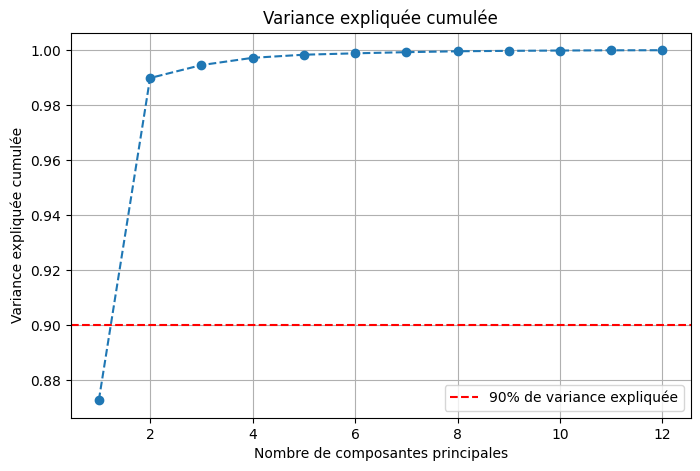

In [ ]:
# Visualisation du pourcentage de variance expliquée
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.axhline(0.9, color='r', linestyle='--', label='90% de variance expliquée')
plt.title("Variance expliquée cumulée")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Étape 4 : b) Interprétation des deux premiers axes
print("Contributions des variables aux deux premiers axes :")
print(pd.DataFrame(pca.components_[:2], columns=[f'Mois {i+1}' for i in range(12)]))


Contributions des variables aux deux premiers axes :
     Mois 1    Mois 2    Mois 3    Mois 4    Mois 5    Mois 6    Mois 7  \
0  0.271510  0.288462  0.301081  0.303542  0.283531  0.278419  0.272903   
1  0.399335  0.299072  0.129431 -0.115306 -0.323143 -0.358468 -0.388796   

     Mois 8    Mois 9   Mois 10   Mois 11   Mois 12  
0  0.287578  0.304720  0.303855  0.292428  0.272955  
1 -0.301013 -0.112316  0.122492  0.262695  0.386937  


Les lignes du tableau représentent les axes principaux :

Ligne 0 (Composante principale 1) : Contributions des 12 mois à la première composante principale (axe 1).
Ligne 1 (Composante principale 2) : Contributions des 12 mois à la deuxième composante principale (axe 2).
Les colonnes représentent les 12 mois, avec des coefficients qui indiquent dans quelle mesure chaque mois influence l'axe correspondant.

Une ville ayant une forte valeur sur l'axe 1 est probablement une ville globalement chaude (peu de variabilité entre les mois).
Une ville ayant une valeur élevée sur l'axe 2 pourrait avoir des hivers particulièrement froids et des étés relativement doux.

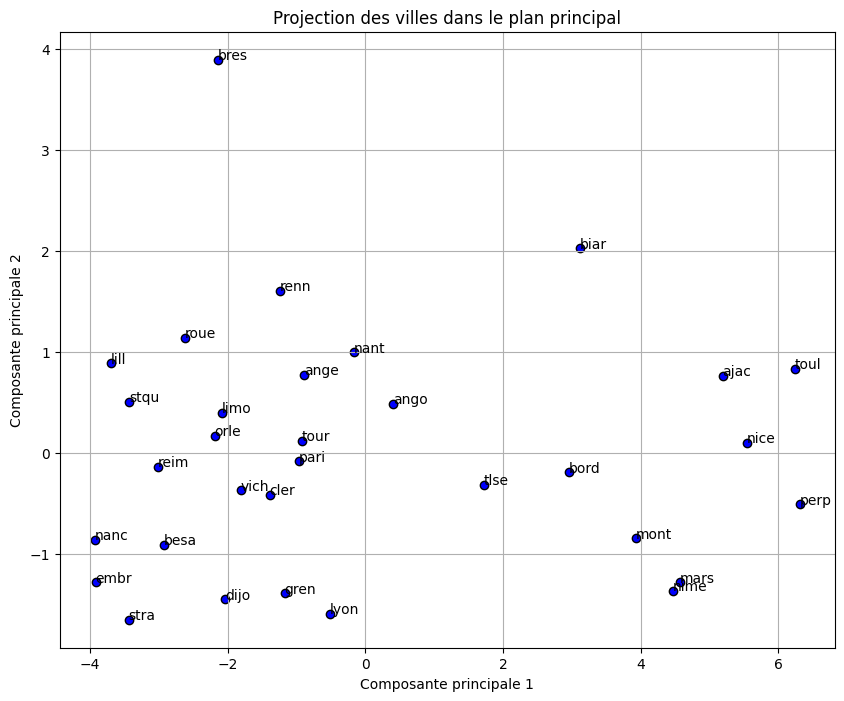

In [ ]:
# Étape 5 : c) Visualisation des villes dans le plan principal
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='blue', edgecolor='k')
for l, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(l, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.title("Projection des villes dans le plan principal")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()


Analyse des positions des villes dans le plan projeté :
Le graphique montre les positions des villes dans le plan défini par les deux premiers axes principaux (ACP). Vous avez remarqué que :

Brest se trouve à l'extrémité supérieure de l'axe principal 2 (Composante principale 2).
Strasbourg se trouve à l'extrémité inférieure de cet axe.

**Sur Axe principale 2**
\
Position haute (Brest) :

Brest a une contribution fortement positive sur l'axe 2, ce qui signifie qu'elle est caractérisée par des hivers plus doux et des étés plus frais.
Brest étant une ville côtière, son climat océanique explique cette faible amplitude saisonnière. La température reste modérée toute l'année.
Position basse (Strasbourg) :

Strasbourg a une contribution fortement négative sur l'axe 2, ce qui indique une forte saisonnalité : des étés chauds et des hivers froids.
Ce comportement est typique des climats continentaux, avec des variations importantes entre les saisons.


*******************
Différence sur les axes :

L'axe 1 met en avant la différence de chaleur générale : Brest est plus modérée que Strasbourg.
L'axe 2 montre la différence de variabilité saisonnière : Brest est stable, tandis que Strasbourg est très saisonnière.


In [ ]:
# Étape 7 : e) Fonction regroupant toutes les procédures
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def analyse_acp(filepath, sep=';', label_col='ville'):
    # Chargement des données
    data = pd.read_csv(filepath, sep=sep)

    # Vérification des colonnes disponibles
    print("Colonnes disponibles :", data.columns)

    # Extraction des labels (noms des villes)
    labels = data[label_col].values  # Utilisation de la colonne 'ville'

    # Sélection des colonnes numériques (températures mensuelles)
    numeric_cols = data.columns[1:].to_list()  # On prend toutes les colonnes sauf la première (les mois)
    X = data[numeric_cols].values

    # Standardisation des données
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # ACP
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    variance_expliquee = np.cumsum(pca.explained_variance_ratio_) * 100
    n_axes = np.argmax(variance_expliquee >= 90) + 1

    # Contributions des variables aux deux premiers axes
    contributions = pd.DataFrame(pca.components_[:2], columns=numeric_cols)
    print("Contributions des variables aux deux premiers axes :")
    print(contributions)

    # Visualisation des villes projetées dans le plan principal
    plt.figure(figsize=(10, 7))
    plt.scatter(X_pca[:, 0], X_pca[:, 1])
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(0, 2), textcoords='offset points')
    plt.title("Projection dans le plan principal (ACP) ")
    plt.xlabel("Axe 1")
    plt.ylabel("Axe 2")
    plt.grid()
    plt.show()

    # Résultats
    print("Variance expliquée cumulée :", variance_expliquee)
    print("Nombre d'axes nécessaires :", n_axes)




Colonnes disponibles : Index(['ville', 'janv', 'fev', 'mars', 'avril', 'mai', 'juin', 'juil', 'aout',
       'sept', 'oct', 'nov', 'dec'],
      dtype='object')
Contributions des variables aux deux premiers axes :
       janv       fev      mars     avril       mai      juin      juil  \
0  0.271510  0.288462  0.301081  0.303542  0.283531  0.278419  0.272903   
1  0.399335  0.299072  0.129431 -0.115306 -0.323143 -0.358468 -0.388796   

       aout      sept       oct       nov       dec  
0  0.287578  0.304720  0.303855  0.292428  0.272955  
1 -0.301013 -0.112316  0.122492  0.262695  0.386937  


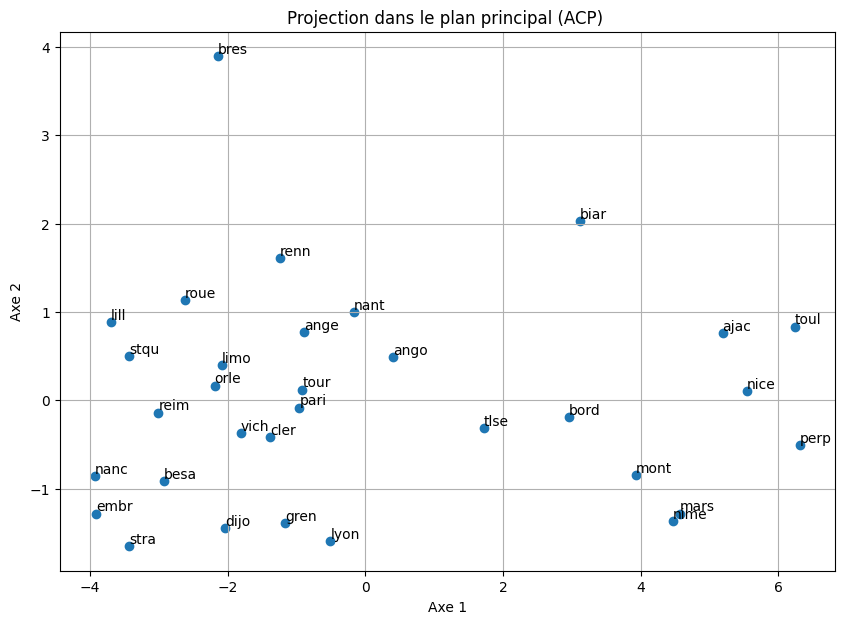

Variance expliquée cumulée : [ 87.26819349  98.98879529  99.45835811  99.72314943  99.83667746
  99.88681357  99.92910253  99.96191988  99.97708573  99.9888501
  99.99721445 100.        ]
Nombre d'axes nécessaires : 2


In [ ]:
#TEST sur villes
# Test de la fonction sur le fichier "villes.csv"
# Afficher les colonnes disponibles
#print("Colonnes disponibles :", data.columns)
# Test de la fonction sur le fichier "villes.csv"

analyse_acp('./villes.csv', sep=';', label_col='ville')

Appliquer la fonction précédente sur le jeu de données "crimes.csv". Il s’agit des statistiques de criminalité
dans 50 états américains. Dans chaque état, sept types de crimes ou délits sont repérés par leurs nombres
annuels de faits constatés rapportés sur 100 000 habitants : meurtres (Meurtre), enlèvements (Rapt), vols
avec violence(Vol), agressions (Attaque), viol (Viol), vols peu importants (Larcin), vols de voitures
(Auto_Theft). Interpréter et comparer les résultats obtenus pour ce Jeu de données. Avec les éléments que
vous avez, peut-on visuellement identifier une typologie des individus pour ce jeu de données.

In [ ]:
data_crimes = pd.read_csv('./crimes.csv', sep=';')
print(data_crimes.head())


        Etat   Meutre  Rapt    Vol  Attaque    Viol  Larcin  Auto_Theft
0     Alabama    14.2  25.2   96.8    278.3  1135.5  1881.9       280.7
1      Alaska    10.8  51.6   96.8    284.0  1331.7  3369.8       753.3
2     Arizona     9.5  34.2  138.2    312.3  2346.1  4467.4       439.5
3    Arkansas     8.8  27.6   83.2    203.4   972.6  1862.1       183.4
4  California    11.5  49.4  287.0    358.0  2139.4  3499.8       663.5


Colonnes disponibles : Index(['Etat ', 'Meutre', 'Rapt', 'Vol', 'Attaque', 'Viol', 'Larcin',
       'Auto_Theft'],
      dtype='object')
Contributions des variables aux deux premiers axes :
     Meutre      Rapt       Vol   Attaque      Viol    Larcin  Auto_Theft
0  0.300279  0.431759  0.396875  0.396652  0.440157  0.357360    0.295177
1  0.629174  0.169435 -0.042247  0.343528 -0.203341 -0.402319   -0.502421


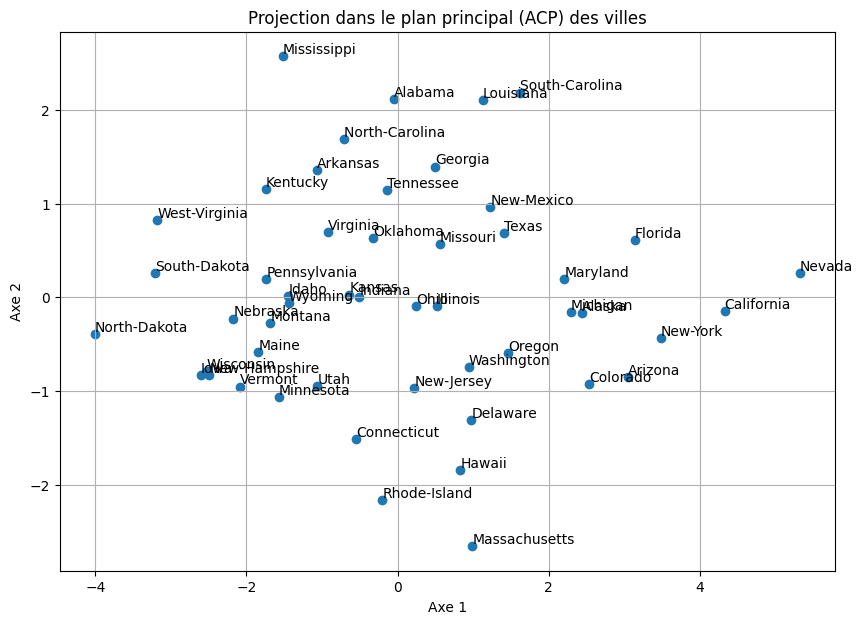

Variance expliquée cumulée : [ 58.78513586  76.48116202  86.84997097  91.37042876  95.05577818
  98.22777063 100.        ]
Nombre d'axes nécessaires : 4


In [ ]:
# Test de la fonction sur le fichier "crime.csv"
analyse_acp('./crimes.csv', sep=';', label_col='Etat ')


Analyse des positions sur les axes principaux

Axe 1 (axe horizontal) :

*North Dakota se trouve à gauche (près de -4), et Nevada se trouve à droite (près de 5). Cela suggère que North Dakota a relativement moins de crimes violents comme les meurtres et les rapts, tandis que Nevada présente un plus grand nombre de ces crimes.
Cela pourrait indiquer que les états situés à gauche de cet axe (comme North Dakota) sont des états avec moins de crimes violents, tandis que ceux à droite (comme Nevada) sont plus exposés à ce genre de crimes.
******************
Axe 2 (axe vertical) :

Mississippi étant en haut de l'axe et Massachusetts étant en bas montre une variation dans les crimes moins violents comme les agressions, viol, et vols de voiture.
Mississippi, étant plus élevé sur cet axe, semble avoir des taux plus élevés de certains crimes comme viol, agressions, ou vols de voiture. À l'inverse, Massachusetts semble avoir des taux plus faibles pour ces crimes.

**resume**


Les États proches du centre du graphique pourraient avoir des profils de criminalité plus équilibrés, avec des niveaux de tous les types de crimes assez proches de la moyenne.
Les États à l'extrême gauche (Axe 1) pourraient indiquer des régions avec moins de crimes violents (ex. North Dakota), tandis que ceux à l'extrême droite peuvent représenter des États avec des niveaux plus élevés de crimes violents ou une plus forte présence de certains crimes (ex. Nevada).
Sur l'Axe 2, les États en haut peuvent être associés à une plus grande prévalence des crimes violents (Meurtre, Viol), et ceux en bas pourraient être associés à des crimes économiques (ex. Larcin, Vol).

**ACP sur les STARTUP**

In [ ]:
data_startups = pd.read_csv('50_Startups.csv')


Colonnes du DataFrame :
Index(['Id;Depenses R&D;Depenses Administration;Depenses Marketing Spend;Benefice'], dtype='object')
Colonnes disponibles : Index(['Id', 'Depenses R&D', 'Depenses Administration',
       'Depenses Marketing Spend', 'Benefice'],
      dtype='object')
Contributions des variables aux deux premiers axes :
   Depenses R&D  Depenses Administration  Depenses Marketing Spend  Benefice
0      0.593479                 0.147379                  0.520647  0.595810
1      0.040481                 0.950513                 -0.307971 -0.006321


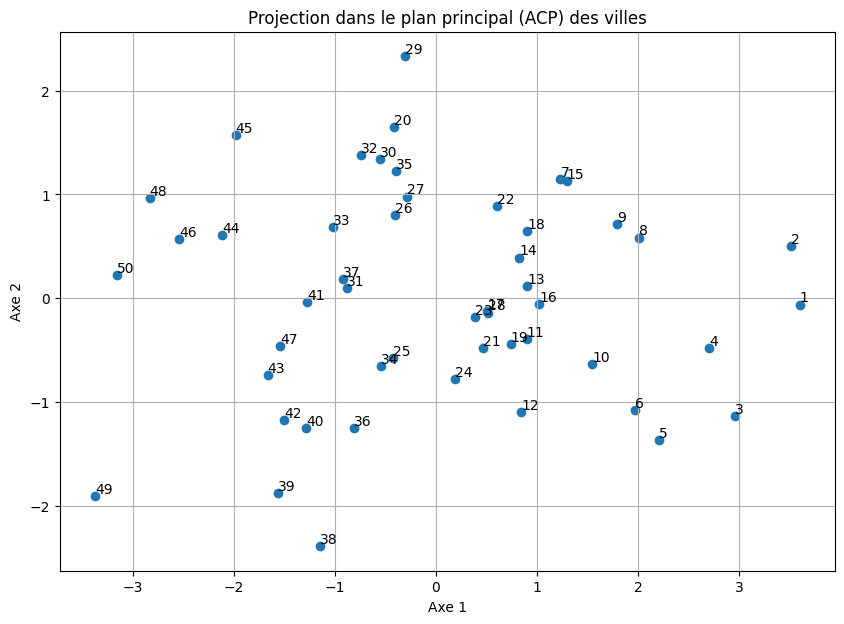

Variance expliquée cumulée : [ 66.80439261  92.28908747  99.3526485  100.        ]
Nombre d'axes nécessaires : 2


In [ ]:
# Appliquer la fonction analyse_acp sur le fichier '50_Startups.csv'
# Ici, le fichier contient les colonnes : 'R&D Spend', 'Administration', 'Marketing Spend', 'Profit'

## Charger le fichier CSV
data = pd.read_csv('./50_Startups.csv', sep=',')

# Afficher les colonnes du DataFrame
print("Colonnes du DataFrame :")
print(data.columns)
analyse_acp('./50_Startups.csv', sep=';', label_col='Id')


**Axe 1**


L'Axe 1 est le principal axe de variation dans les données, car il explique une grande partie de la variance. Voici quelques observations basées sur les contributions des variables à cet axe :

Les plus à droite sur l'Axe 1 :

 Les indices 1 et 2 ont les contributions les plus élevées à l'Axe 1. Cela signifie que ces entreprises ont des caractéristiques particulièrement marquées selon les variables qui influencent fortement cet axe, telles que la dépense en R&D, la dépense en administration, et la dépense en marketing. Ces entreprises sont peut-être plus investies dans l'innovation (R&D), ou plus centrées sur des dépenses administratives et marketing.

Les plus à gauche sur l'Axe 1 :

Les indices 49 et 50 sont les plus à gauche, ce qui suggère que ces entreprises ont des profils opposés. Ces entreprises peuvent être moins dépendantes de la R&D ou des dépenses en administration et marketing. Elles pourraient avoir des stratégies plus frugales ou orientées sur d'autres aspects, comme la réduction des coûts ou une concentration sur des secteurs moins chers.

L'Axe 1 semble donc capturer des entreprises ayant des modèles d'investissement différents, avec un pôle plus hautement investi et un pôle plus frugal.

**Axe 2 :**


Le plus haut sur l'Axe 2 :

 L'entreprise 29 a la contribution la plus élevée sur l'Axe 2. Cela signifie que l'entreprise 29 a des caractéristiques particulières qui se démarquent sur cet axe. Selon les contributions des variables aux axes, cela pourrait indiquer un profil d'entreprise avec une forte dépense en marketing, un niveau modéré en administration et peut-être un faible investissement en R&D.

Le plus bas sur l'Axe 2 :

L'entreprise 38, ayant la contribution la plus faible à l'Axe 2, est peut-être moins influencée par les facteurs liés à cet axe. Cela pourrait suggérer que l'entreprise est plus équilibrée dans ses investissements, ou au contraire, qu'elle adopte une approche qui la rend moins sensible aux dimensions de dépenses particulières (R&D, marketing, administration).